# Problem set 2: Counting words

## Description

The goal of this problem set is to create the world's least visually-sophisticated word count graphic.

Along the way, you'll experiment with stopword removal, case folding, and other processing steps.

## Count words, naïvely

We'll work with *Moby-Dick*, as we did in class. 

**Read the text of *Moby-Dick* from a file (it's on the class GitHub site, in the `data/texts` directory), tokenize it with NLTK's `word_tokenize` function, and count the resulting tokens in a `Counter` object.**

You can refer to the lecture notebook from Monday, September 7, to borrow code to do all of this. But you must get that code working in the cell below. This cell should produce a `Counter` object that holds the token counts from the novel.

In [1]:
# Use standard Python file commands to open Moby-Dick,
#  then count the words in that file.
import os
from collections import Counter
from nltk import word_tokenize

moby_file = os.path.join('..', '..', 'data', 'texts', 'A-Melville-Moby_Dick-1851-M.txt') 
moby_naive = Counter()
with open(moby_file, 'r') as f:
    for line in f:
        for token in word_tokenize(line.strip()):
            moby_naive[token] += 1

**Print the total number of words (hint: use `Counter`'s `.values()` method, along with the `sum` function) in your text, as well as the 20 most frequently occurring terms and their counts.**

We'll do this a lot, so wrap it up as a function that takes as input a `Counter` object and an optional number of top terms to print:

```
def word_stats(data, n=20):
```

The output of your fuction should look like this:

```
Total words in the text: 255380

Top 20 words by frequency:
,      19204
the    13715
.      7432

[and so on ...]
```

In [2]:
# Your word_stats function here
def word_stats(data, n=20):
    '''
    Print total wordcount and n top terms.
    Takes a Counter object and a number of terms to print.
    Returns None.
    '''
    print('Total words in the text:', sum(data.values()))
    print('\nTop 20 words by frequency:')
    for word in data.most_common(20):
        print(word[0], '\t', word[1])
    return None

In [3]:
# Call word_stats on your data
word_stats(moby_naive)

Total words in the text: 255380

Top 20 words by frequency:
, 	 19204
the 	 13715
. 	 7432
of 	 6513
and 	 6010
a 	 4546
to 	 4515
; 	 4173
in 	 3909
that 	 2981
his 	 2459
it 	 2205
I 	 2121
! 	 1767
's 	 1731
is 	 1722
-- 	 1714
he 	 1660
with 	 1659
was 	 1640


## Case folding and stopwords

As you can see, the top words that we counted aren't super informative. That said, list two things that you **can** say about the text with reasonable confidence on the basis of our results above:

**Two things you *can* tell about *Moby-Dick* from the naïve word counts:**
1. It's in English.
1. It's probably narrated in the first person.
1. It probably skews male.
1. (The author is fond of semicolons!)

If we want our word list to be informative, we need to find a way to ignore high-frequency, low-information words. We can do this either by not counting them in the first place, or by excluding them from our reporting after we've collected them. Both methods have advantages and drawbacks. The one you pursue is up to you.

**Modify the original code to ignore token case (e.g., 'The' and 'the' are both counted as occurrences of the same token; note the `.lower()` method for strings) and to remove the English-language stopwords defined by NLTK (`from nltk.corpus import stopwords`). Then display the total token count and top-20 tokens.**

In [4]:
# Count tokens with case folding and NLTK English stopwords removed
from nltk.corpus import stopwords

stops = stopwords.words('english') # NLTK's short list of English stopwords

# For reference, print the list of stopwords
print('NLTK English stopwords:')
print(sorted(stops), '\n')

# Now do the counting
moby_nltk = Counter()
with open(moby_file, 'r') as f:
    for line in f:
        for token in word_tokenize(line.strip().lower()):
            if token not in stops:
                moby_nltk[token] += 1
word_stats(moby_nltk)

NLTK English stopwords:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "s

Is this better? Maybe! **Note one advantage of this stopword-removed count, as well as one disadvantage:**

**Advantage:**

* Gets closer to distinctively meaningful terms ('whale', 'ahab', 'ship', etc.)
* Fewer function words at the top of the list
* Reduces the number of tokens tabulated, which may speed up downstream tasks

**Disadvantage:**

* Loses the token "I", so it has less information about narrative voice
* Still has punctuation, which may not be meaningful
* Transforms a name like "Ahab" into a lowercase form. In some instances, this may make it hard to trace the referent.

Let's see if we can further improve/refine our approach to continue narrowing our word list. Our goal is to produce a list that contains *only* interesting words and ranks them by frequency.

**List at least two ideas for modifying the stopword list to better approach our goal:**

1. Add punctuation to it
1. Add the particle "n't", which the NLTK tokenizer produces from contractions like "can't".
1. Remove the top *x*% of most frequently occurring words?
  1. That's not a great idea for one book, but if we could get that data from a larger corpus ...
1. Add additional terms by hand after examining a longer list of top tokens
1. Remove numbers
1. Remove 1- and 2-letter words

**Implement one or more of your ideas to improve the stopword list, then display the output of your new version.**

In [5]:
# Better stopwords in action!
import string
import re

# Make stoplist a set so as to avoid duplicate items
stops = set(stops)

# Remove standard punctuation marks
#for mark in string.punctuation:
#    stops.add(mark)

# Remove custom punctuation and other hand-curated tokens
custom_stops = [
    '`',
    "'s",
    "n't"
]
for tok in custom_stops:
    stops.add(tok)

# find punctuation-and/or-digit-only tokens 
punct_digit = re.compile(f"^[{string.punctuation}\d]+$")
    
moby_better = Counter()
with open(moby_file, 'r') as f:
    for line in f:
        for token in word_tokenize(line.strip().lower()):
            if token not in stops and punct_digit.match(token) is None:
                moby_better[token] += 1
word_stats(moby_better)

Total words in the text: 108447

Top 20 words by frequency:
whale 	 1096
one 	 913
like 	 580
upon 	 565
ahab 	 511
man 	 498
ship 	 469
old 	 443
ye 	 439
would 	 436
sea 	 384
though 	 383
yet 	 344
time 	 326
captain 	 325
long 	 318
still 	 312
said 	 305
great 	 303
boat 	 291


Refine your stoplist until you're satisfied with it. Make sure your code above displays the final output of your `word_stats` function. Then move on.

# Visualization 

Now, make the world's least visually-impressive word count graphic. Your task is to produce a visual representation of your top 10 words that shows the relative frquency of those terms.

The simplest acceptable version of this visualization is a bar chart. **Complete the starter code below to produce a bar chart of the top ten words in the text.**

Your output might look like this:

![bar chart](ps_02_bar_chart.png)

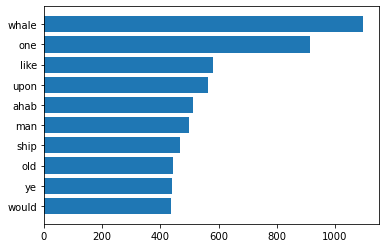

In [6]:
# Make a bar chart of the top 10 words
%matplotlib inline
import matplotlib.pyplot as plt

# Get labels and counts
labels = [result[0] for result in moby_better.most_common(10)]
counts = [result[1] for result in moby_better.most_common(10)]

# Create the figure
fig, ax = plt.subplots()
ax.barh(labels, counts)
ax.invert_yaxis()
plt.savefig('ps_02_bar_chart.png')
plt.show()

**Optional:** Make a word cloud. You can do this the ugly way in pure `matplotlib` or the easy-and-pretty way by using the [`wordcloud`](https://github.com/amueller/word_cloud) library:

```
conda install -c conda-forge wordcloud
```
If you use `wordcloud`, you'll be interested in the [`.generate_from_frequencies()` method](http://amueller.github.io/word_cloud/auto_examples/frequency.html).

Here are examples of the ugly and the pretty outputs. Your specific results might vary.

![ugly](ps_02_ugly_cloud.png)
![pretty](ps_02_pretty_cloud.png)

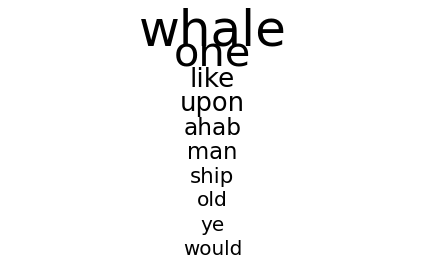

In [7]:
# The ugly way (matplotlib)
fig, ax = plt.subplots()
max_count = max(moby_better.values())
for i, token_data in enumerate(moby_better.most_common(10)):
    ax.text(
        x=0.5, 
        y=1-i/10, 
        s=token_data[0], 
        size=50*token_data[1]/max_count,
        ha='center',
        va='center'
    )
plt.axis('off')
plt.tight_layout()
plt.savefig('ps_02_ugly_cloud.png')
plt.show()

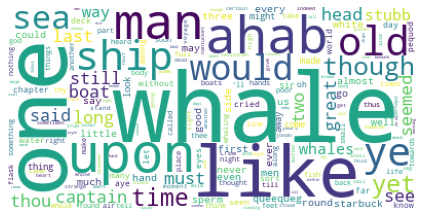

In [8]:
# The pretty way
from wordcloud import WordCloud
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(moby_better)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout()
plt.savefig('ps_02_pretty_cloud.png')
plt.show()